# Implementing Logistic Regression

In [286]:
## Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import math
import scipy.io

## Data Gathering and Preprocessing

In [287]:
# Load MATLAB file
mat_data = scipy.io.loadmat('failure_2.mat')
mat_data

# Extract X_train, X_test, and Y_train
X_train = mat_data['Xtrain']
X_test = mat_data['Xtest']
Y_train = mat_data['Ytrain']

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)



In [288]:
# Determine the number of samples
num_samples = X_train.shape[0]

# Determine the number of samples for training and validation
num_train_samples = int(0.7 * num_samples)
num_val_samples = num_samples - num_train_samples

# Shuffle the indices
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Split the indices into training and validation indices
train_indices = indices[:num_train_samples]
val_indices = indices[num_train_samples:]

# Split the data into training and validation sets
X_train_split = X_train[train_indices]
Y_train_split = Y_train[train_indices]

X_val_split = X_train[val_indices]
Y_val_split = Y_train[val_indices]

In [278]:
# (i) Standardize each column
def standardize(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_standardized = (X_train - mean) / std
    X_test_standardized = (X_test - mean) / std
    return X_train_standardized, X_test_standardized

X_train_standardized, X_test_standardized = standardize(X_train, X_test)
X_train_split_standardized,X_val_split_standardized = standardize(X_train_split, X_val_split)

In [4]:
# (ii) Transform the features using log transformation
def log_transform(X_train, X_test):
    X_train_log = np.log(X_train + 0.1)
    X_test_log = np.log(X_test + 0.1)
    return X_train_log, X_test_log

X_train_log, X_test_log = log_transform(X_train, X_test)

In [5]:
# (iii) Binarize the features
def binarize(X_train, X_test):
    X_train_binarized = np.where(X_train > 0, 1, 0)
    X_test_binarized = np.where(X_test > 0, 1, 0)
    return X_train_binarized, X_test_binarized

X_train_binarized, X_test_binarized = binarize(X_train, X_test)

## Computing the loss function

In [200]:
# Logistic loss function
def compute_loss(X, y, theta):
    m = len(y)
    z = X @ theta
    J = 1/m*np.sum(np.log(1 + np.exp(-y * z)))
    return J

## Computing the gradient

In [291]:
def compute_gradient(theta, X, y):
    N = len(y)
    z = X @ theta
    exp_term = np.exp(-y * z)
    sigmoid = 1 / (1 + exp_term)
    grad = (-(1 / N) * X.T @ (sigmoid * exp_term * y) )
    return grad

## Implementing Batch gradient descent

In [217]:
# Batch gradient descent
def batch_gradient_descent(X, y, learning_rate=0.01, num_epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1) * 0.01
    losses = []

    for epoch in range(num_epochs):
        gradient = compute_gradient(theta , X, y)
        theta -= learning_rate * gradient
        loss = compute_loss(X, y, theta)
        losses.append(loss)
        
    return theta, losses

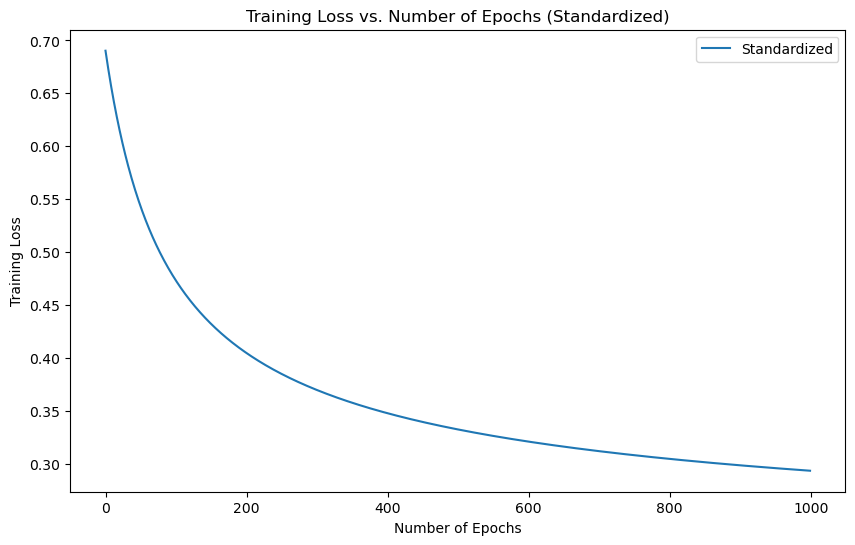

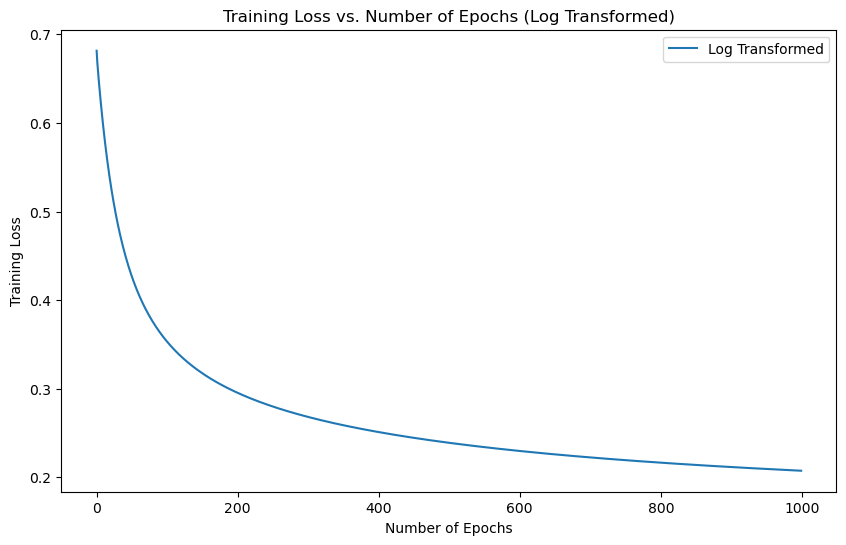

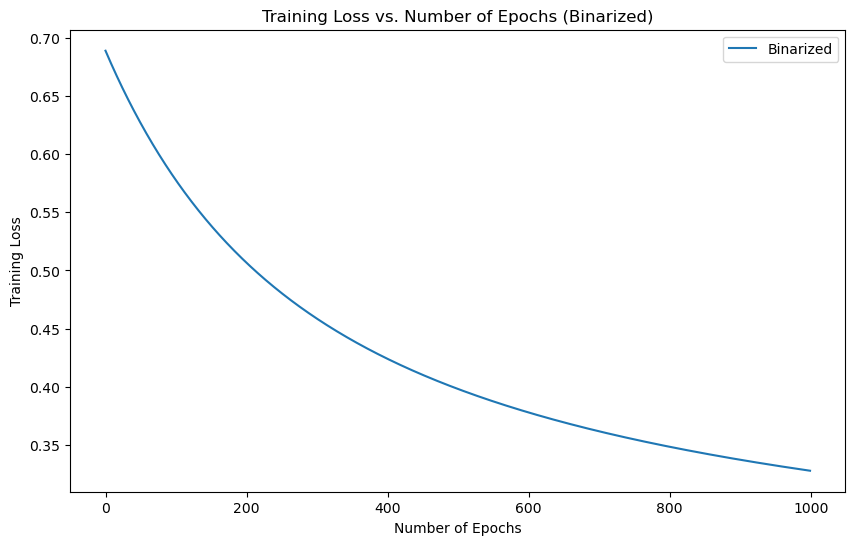

In [236]:
# Perform logistic regression with batch gradient descent for each preprocessing method
theta_standardized, losses_standardized = batch_gradient_descent(X_train_standardized, Y_train)
theta_log_transformed, losses_log_transformed = batch_gradient_descent(X_train_log, Y_train)
theta_binarized, losses_binarized = batch_gradient_descent(X_train_binarized, Y_train)

# Plot training loss vs. number of epochs for each preprocessing method
plt.figure(figsize=(10, 6))
plt.plot(losses_standardized, label='Standardized')
plt.title('Training Loss vs. Number of Epochs (Standardized)')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses_log_transformed, label='Log Transformed')
plt.title('Training Loss vs. Number of Epochs (Log Transformed)')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses_binarized, label='Binarized')
plt.title('Training Loss vs. Number of Epochs (Binarized)')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

## Implementing Stochastic gradient descent

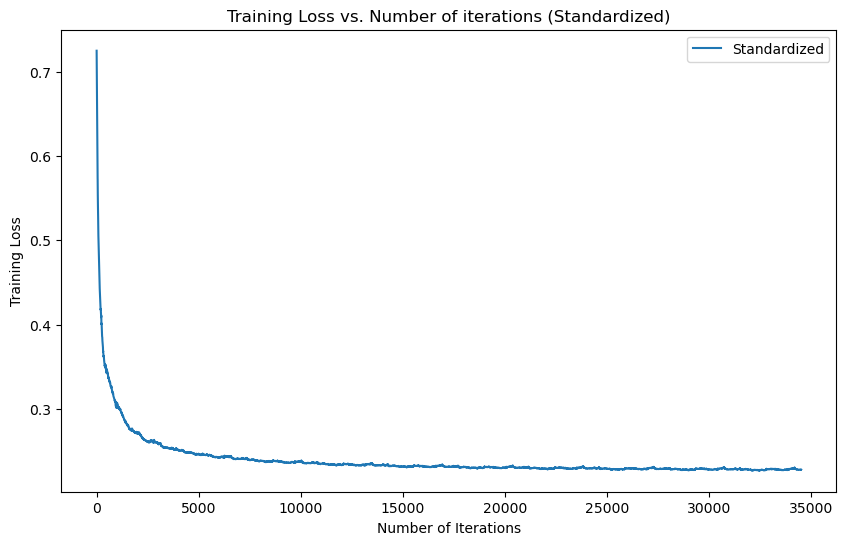

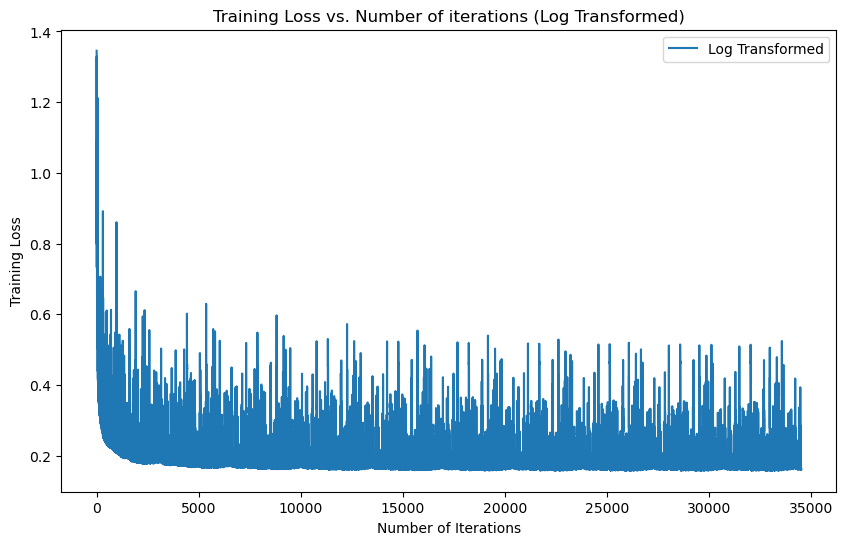

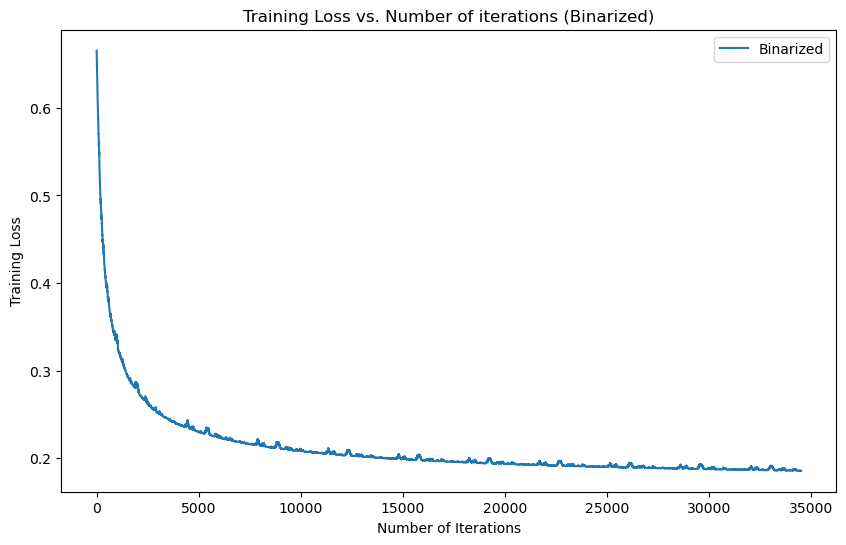

In [292]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=10):
    m, n = X.shape
    theta = np.random.randn(n, 1) * 0.1
    losses = []

    for epoch in range(num_epochs):
        gradient = 0
        for i in range(m):
            rand_idx = i
            xi = X[rand_idx, :].reshape(1, -1)
            yi = y[rand_idx].reshape(1, 1)
            gradient = compute_gradient(theta ,xi, yi)
            theta -= learning_rate * gradient
            loss = compute_loss(X, y, theta)
            losses.append(loss)
            
    return theta, losses

theta_standardized, losses_standardized = stochastic_gradient_descent(X_train_standardized, Y_train)
theta_log_transformed, losses_log_transformed = stochastic_gradient_descent(X_train_log, Y_train)
theta_binarized, losses_binarized = stochastic_gradient_descent(X_train_binarized, Y_train)

# Plot training loss vs. number of epochs for each preprocessing method
plt.figure(figsize=(10, 6))
plt.plot(losses_standardized, label='Standardized')
plt.title('Training Loss vs. Number of iterations (Standardized)')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses_log_transformed, label='Log Transformed')
plt.title('Training Loss vs. Number of iterations (Log Transformed)')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses_binarized, label='Binarized')
plt.title('Training Loss vs. Number of iterations (Binarized)')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()


## Implementing SGD with variable Learning Rate

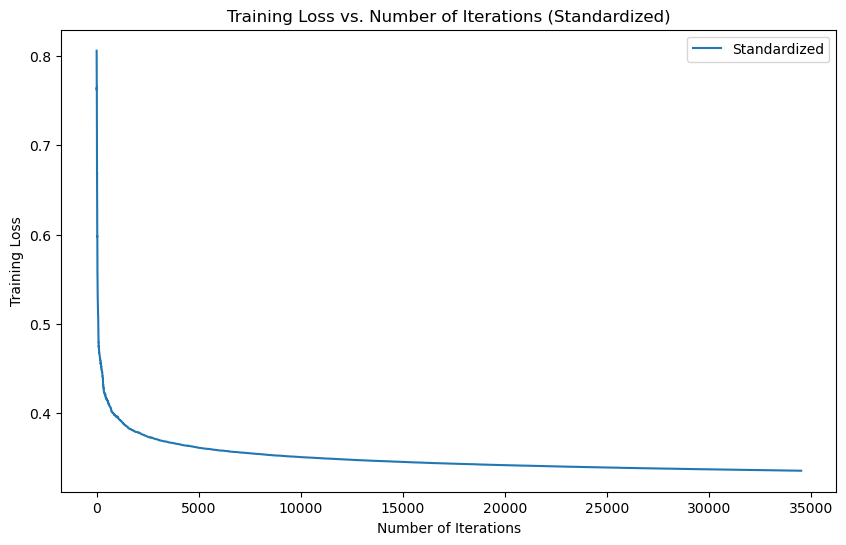

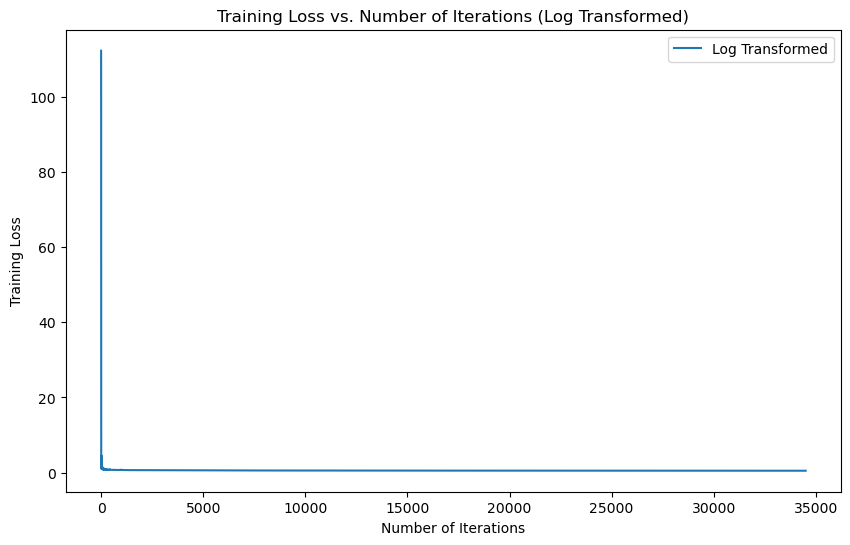

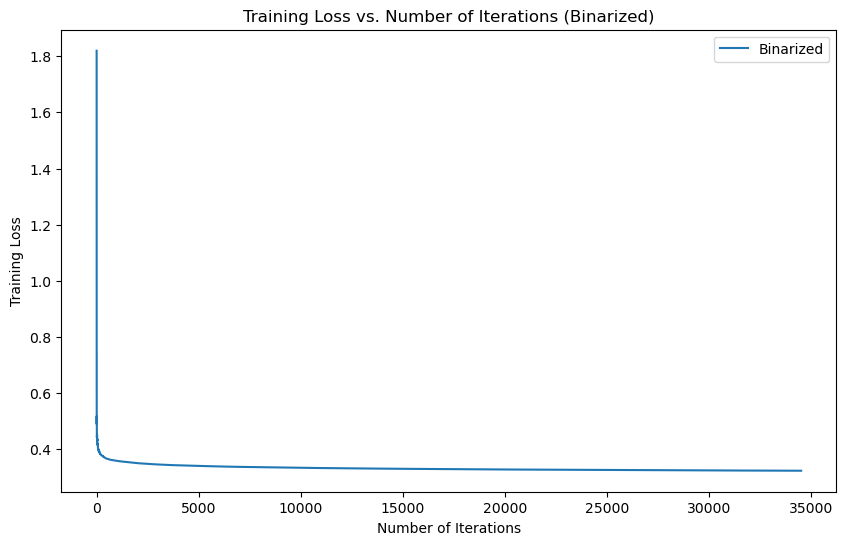

In [266]:
def stochastic_gradient_descent(X, y,learning_rate=0.01, num_epochs=10):
    m, n = X.shape
    theta = np.random.randn(n, 1) * 0.1
    losses = []
    total_itr = m * num_epochs
    
    for epoch in range(1, num_epochs + 1):
        for i in range(1,m+1):
            if(epoch == 1):
                iteration = i
            else:
                iteration = ((epoch - 1)*m + i) 
            xi = X[i-1, :].reshape(1, -1)
            yi = y[i-1].reshape(1, 1)
            learning_rate = 1 / iteration  # Decreasing learning rate
            gradient = compute_gradient(theta, xi, yi)
            theta -= learning_rate * gradient
            loss = compute_loss(X, y, theta)
            losses.append(loss)
            
    return theta, losses

theta_standardized, losses_standardized = stochastic_gradient_descent(X_train_standardized, Y_train)
theta_log_transformed, losses_log_transformed = stochastic_gradient_descent(X_train_log, Y_train)
theta_binarized, losses_binarized = stochastic_gradient_descent(X_train_binarized, Y_train)

plt.figure(figsize=(10, 6))
plt.plot(losses_standardized, label='Standardized')
plt.title('Training Loss vs. Number of Iterations (Standardized)')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses_log_transformed, label='Log Transformed')
plt.title('Training Loss vs. Number of Iterations (Log Transformed)')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses_binarized, label='Binarized')
plt.title('Training Loss vs. Number of Iterations (Binarized)')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

## Regularisation

In [270]:
# Logistic loss function
def compute_loss_ridge(X, y, theta , lam):
    m = len(y)
    z = X @ theta
    sum_extra = np.sum(theta**2)
    J = (1/m*np.sum(np.log(1 + np.exp(-y * z)))) + (lam/2) * sum_extra
    return J

In [274]:
def compute_gradient_ridge(theta, X, y , lam):
    N = len(y)
    z = X @ theta
    exp_term = np.exp(-y * z)
    sigmoid = 1 / (1 + exp_term)
    grad = (-(1 / N) * X.T @ (sigmoid * exp_term * y)) + (lam * theta)
    return grad

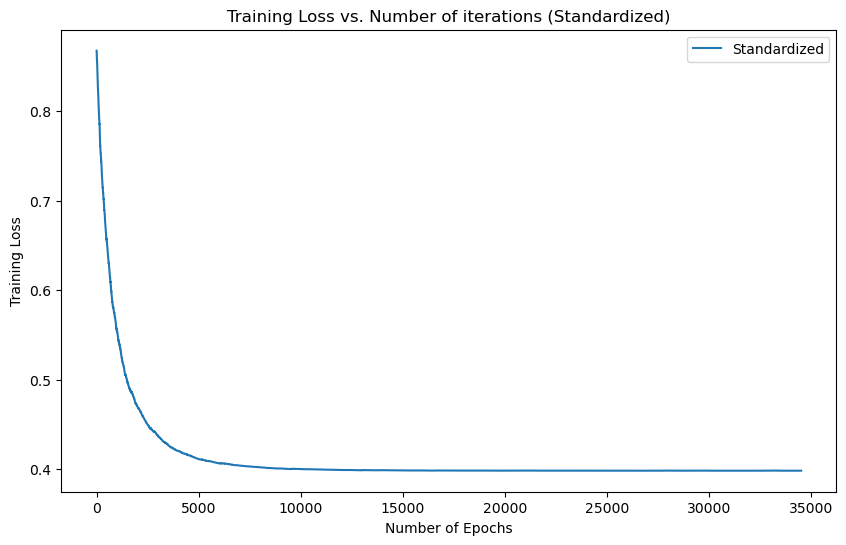

In [285]:
def stochastic_gradient_descent_ridge(X, y, learning_rate=0.001, num_epochs=10):
    m, n = X.shape
    theta = np.random.randn(n, 1) * 0.1
    losses = []

    for epoch in range(num_epochs):
        gradient = 0
        for i in range(m):
            rand_idx = i
            xi = X[rand_idx, :].reshape(1, -1)
            yi = y[rand_idx].reshape(1, 1)
            gradient = compute_gradient_ridge(theta ,xi, yi , 0.1)
            theta -= learning_rate * gradient
            loss = compute_loss_ridge(X, y, theta , 0.1)
            losses.append(loss)
            
    return theta, losses

theta_standardized, losses_standardized = stochastic_gradient_descent_ridge(X_train_standardized, Y_train)

# Plot training loss vs. number of epochs for each preprocessing method
plt.figure(figsize=(10, 6))
plt.plot(losses_standardized, label='Standardized')
plt.title('Training Loss vs. Number of iterations (Standardized)')
plt.xlabel('Number of iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()
